In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
spot_prices = pd.read_csv("../src/data/spot_prices.csv", parse_dates=["time"]).set_index("time")
spot_prices = spot_prices.interpolate()
spot_prices.index = spot_prices.index.tz_localize(None)
spot_prices = spot_prices[spot_prices.index >= datetime(2021, 3, 18)]
spot_prices = spot_prices[~spot_prices.index.duplicated(keep='first')]
spot_prices[spot_prices.index == datetime(2021, 3, 28, hour=1)]
spot_prices.price = spot_prices.price /1000

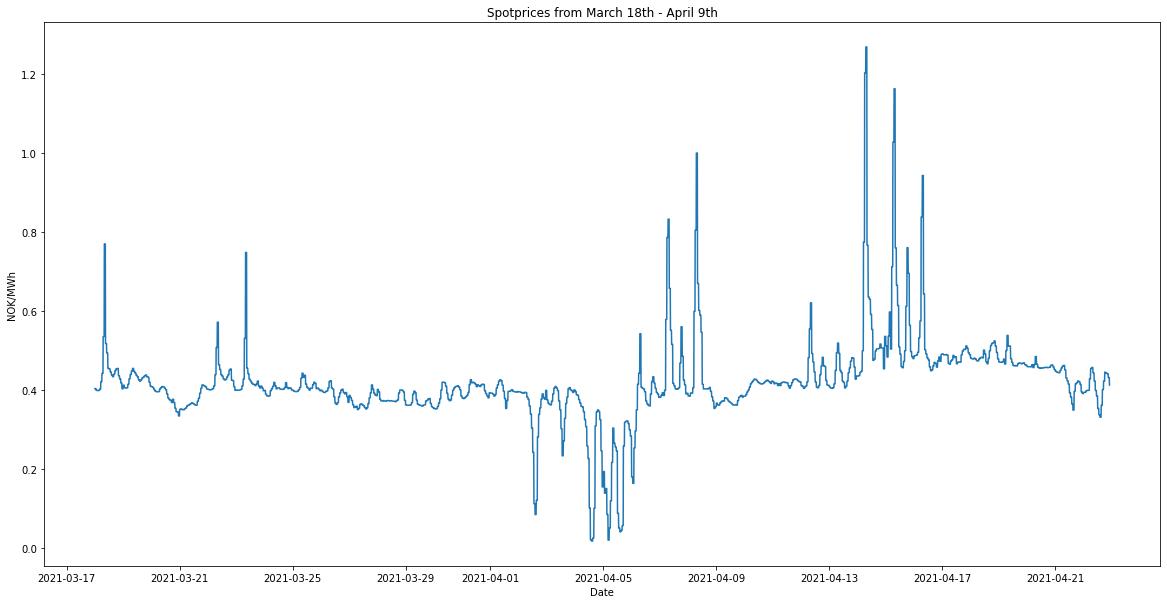

In [3]:
spot_prices = spot_prices.resample(rule = "10T").ffill()
plt.figure(figsize =(20, 10))
plt.plot(spot_prices.price)
plt.title("Spotprices from March 18th - April 9th")
plt.xlabel("Date")
plt.ylabel("NOK/MWh")
plt.show()

In [4]:
spot_prices.to_csv("../src/data/spot_prices.csv")